In [ ]:
from google.colab import drive
drive.mount("/content/drive" ,force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 263 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import os
import os.path
import imutils
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import math
import argparse
import glob
from tqdm import tqdm

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

In [ ]:
cv2.__version__

'4.4.0'

In [ ]:
# for weather_dataset(11 class) ,weather_dataset2(4 class)

In [ ]:
TRAIN="/content/drive/MyDrive/Thesis/weather_dataset_4"
#TRAIN="/content/drive/MyDrive/Thesis/weather_dataset_11"

In [ ]:
#CLASS = ["dew", "fogsmog" ,"frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]
CLASS = ["cloudy","rain","shine","sunrise"]

In [ ]:
train_data= []

In [ ]:
for category in CLASS:
  path = os.path.join(TRAIN,category)  # create path to weather class
  train_labels = CLASS.index(category)
  for img in os.listdir(path):  # iterate over each image per class    
    train_img = os.path.join(path,img)# target_size =(100,100))# resize
    train_data.append(train_img)


In [ ]:
train_data

['/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (98).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (96).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (10).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (97).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (99).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (1).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (76).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (28).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (109).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (136).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (19).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (274).jpg',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy (206).jpg',
 '/content/drive/MyDri

In [ ]:
def CalcFeatures(img):
        feat = cv2.SIFT_create()
        #feat=cv2.xfeatures2d.SURF_create()
        kp, des = feat.detectAndCompute(img, None)
        return des

In [ ]:
features = []
for file in train_data:
    img = cv2.imread(file)
    if type(img) is np.ndarray:
            if img.size == 0:
                continue
    if img is None:
      continue
    img_des = CalcFeatures(img)
    
features.append(img_des)
features = np.vstack(features)

In [ ]:
len(features), img_des.shape,len(img_des)

(119, (119, 128), 119)

In [ ]:
k =119
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 4, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centres = cv2.kmeans(np.float32(features), k, None, criteria, 4, flags)

In [ ]:
def bag_of_features(features, centres, k = 500):
        vec = np.zeros((1, k))
        for i in range(features.shape[0]):
            feat = features[i]
            diff = np.tile(feat, (k, 1)) - centres
            dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
            idx_dist = dist.argsort()
            idx = idx_dist[0]
            vec[0][idx] += 1
        return vec

In [ ]:
labels = []
vec = []
for file in train_data:
    img = cv2.imread(file, 0)
    if type(img) is np.ndarray:
            if img.size == 0:
                continue
    if img is None:
      continue
    img_des = CalcFeatures(img)
    if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        label = file.split("(")[0]  # 'label
        labels.append(label)   
vec = np.vstack(vec)

In [ ]:
len(vec),len(labels)

(1099, 1099)

In [ ]:
X_train = vec 
y_train = labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(vec, labels, test_size=0.1,random_state=0, stratify = labels)

In [ ]:
y_train

['/content/drive/MyDrive/Thesis/weather_dataset_4/shine/shine ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/sunrise/sunrise ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/sunrise/sunrise ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/sunrise/sunrise ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/sunrise/sunrise ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/rain/rain ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/sunrise/sunrise ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/shine/shine ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/sunrise/sunrise ',
 '/content/drive/MyDrive/Thesis/weather_dataset_4/shine/sh

In [ ]:
clf = SVC(kernel='linear')

clf.fit(x_train, y_train)


SVC(kernel='linear')

In [ ]:
preds = clf.predict(x_test)

In [ ]:
# printing the labels that are predicted
for pred2, lbl2 in zip(preds, y_test):
    print("\nResult:{} \nPrediction: {}\n".format(lbl2, pred2))



Result:/content/drive/MyDrive/Thesis/weather_dataset_4/rain/rain  
Prediction: /content/drive/MyDrive/Thesis/weather_dataset_4/shine/shine 


Result:/content/drive/MyDrive/Thesis/weather_dataset_4/rain/rain  
Prediction: /content/drive/MyDrive/Thesis/weather_dataset_4/rain/rain 


Result:/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy  
Prediction: /content/drive/MyDrive/Thesis/weather_dataset_4/rain/rain 


Result:/content/drive/MyDrive/Thesis/weather_dataset_4/sunrise/sunrise  
Prediction: /content/drive/MyDrive/Thesis/weather_dataset_4/shine/shine 


Result:/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy  
Prediction: /content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy 


Result:/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy  
Prediction: /content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy 


Result:/content/drive/MyDrive/Thesis/weather_dataset_4/cloudy/cloudy  
Prediction: /content/drive/MyDrive/Thesis/weather_dataset_

In [ ]:
# printing the evaluations measures
print("\nAccuracy on test Set = \n", accuracy_score(y_test, preds)*100)
print("\nClassification Report (test Set):\n")
cr = classification_report(y_test, preds, target_names=CLASS)
print(cr)


Accuracy on test Set = 
 50.0

Classification Report (test Set):

              precision    recall  f1-score   support

      cloudy       0.50      0.52      0.51        29
        rain       0.59      0.76      0.67        21
       shine       0.40      0.40      0.40        25
     sunrise       0.50      0.40      0.44        35

    accuracy                           0.50       110
   macro avg       0.50      0.52      0.50       110
weighted avg       0.49      0.50      0.49       110



In [ ]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
l= np.array(CLASS)
type(l)

numpy.ndarray

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


TypeError: ignored

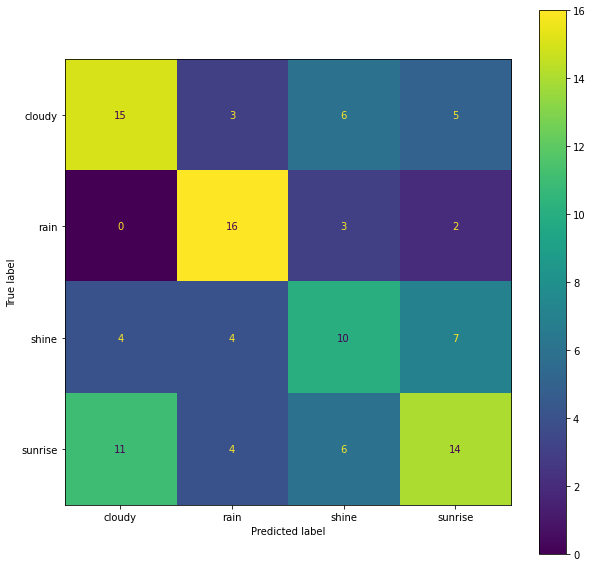

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
fig, ax = plot_confusion_matrix(clf, x_test, y_test,ax=ax,  display_labels=l)

plt.show()